# Ajustes de calibración. Modelos paramétricos lineales

## El caso más *simple*: un único parámetro

En ocasiones, las más favorables, nuestro aparato de medida responde linealmente a la magnitud que queremos medir.

En estos casos para calibrar nuestro aparato basta con determinar un factor de calibración.

Matemáticamente este factor de calibración es la pendiente de la recta que relaciona la magnitud a medir con la respuesta en el aparato.

El proceso de calibración y medida se puede esquematizar de la siguiente forma;

- Calibración (Caracterización de la función de *respuesta*)
    + Fijamos cantidades definidas de la magnitud a medir y cuantificamos la respuesta
    + Determinamos la pendiente de la función de respuesta
- Medida (Utilización de la función de *calibración*)
    + Sometemos a nuestro aparato de medida a cantidades desconocidas de la magnitud a medir y determinamos la respuesta del sistema
    + Mediante la recta de calibración, inversa de la recta de respuesta, covertimos la respuesta en valor medido

Imáginemos que queremos calibrar una cámara de ionización mediante este procedimiento.

Tendremos unos valores de carga recolectada para diferentes valores fijados de dosis. En ausencia de fugas a dosis cero la cámara tiene lectura cero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Conocido el factor de calibración real

In [2]:
fcr = 0.0341

Podemos calcular los valores que leeríamos en ausencia de incertidumbres

In [18]:
D = np.array([0, 1, 2, 4, 10])
L = D * fcr

y representarlo

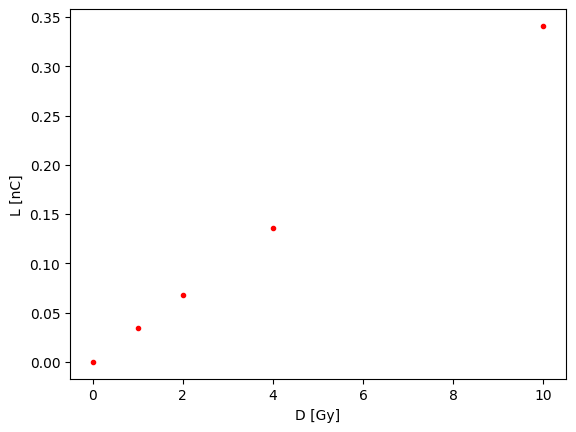

In [19]:
fig, ax = plt.subplots()
ax.plot(D, L, 'r.')
ax.set_xlabel('D [Gy]')
ax.set_ylabel('L [nC]')
plt.show()

Para determinar los factores de calibración importamos un submódulo `stats` de `sicpy`

In [7]:
from scipy import stats

y hacemos el ajuste

Parámetros de  la curva de respuesta: Fc: 0.0341, fugas: 0.0000, r: 1.000, error estándar: 0.000



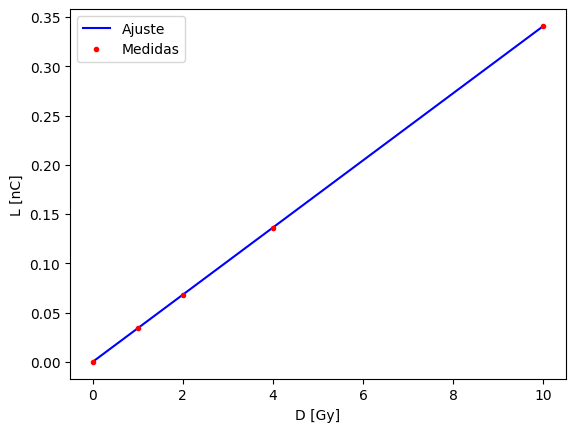

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(D, L)

# Mostar los coeficientes lineales de ajuste y su coeficiente de determinación
print(r'Parámetros de  la curva de respuesta: Fc: %.4f, fugas: %.4f, r: %.3f, error estándar: %.3f'%(slope, intercept, r_value, std_err))
print()

# Representar los datos medidos y sus ajustes
fig, ax = plt.subplots()
ax.plot(D, slope * D + intercept, 'b-', label='Ajuste')
ax.plot(D, L, 'r.', label='Medidas')
ax.set_xlabel('D [Gy]')
ax.set_ylabel('L [nC]')
ax.legend()
plt.show()

Determinamos los valores reales pero este ejemplo es muy poco realista.

En la realidad cada vez que realicemos una medida tendrá asociada una incertidumbre. 

Vamos a suponer que la incertidumbre es proporcional al valor medido. Tomemos una incertdumbre del 3% (k = 1) en cada medida.

Empleamos `numpy` para generar valores aleatorios de incertidumbre y perturbamos (hacemos más reales) nuestras medidas.

Intetamos a continuación caracterizar nuestros factores de calibración

Parámetros de  la curva de respuesta: Fc: 0.0345, fugas: -0.0010, r: 0.99979, error estándar: 0.00041



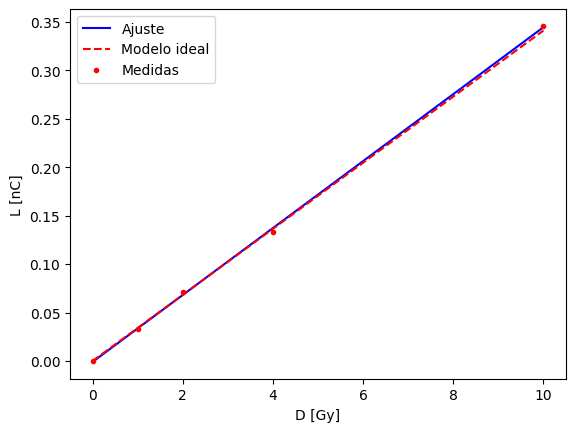

In [33]:
relative_unc = np.random.normal(1, 0.03, 5)
Lr = L * relative_unc

slope, intercept, r_value, p_value, std_err = stats.linregress(D, Lr)

# Mostar los coeficientes lineales de ajuste y su coeficiente de determinación
print(r'Parámetros de  la curva de respuesta: Fc: %.4f, fugas: %.4f, r: %.5f, error estándar: %.5f'%(slope, intercept, r_value, std_err))
print()

# Representar los datos medidos y sus ajustes
fig, ax = plt.subplots()
ax.plot(D, slope * D + intercept, 'b-', label='Ajuste')
ax.plot(D, L, 'r--', label='Modelo ideal')
ax.plot(D, Lr, 'r.', label='Medidas')
ax.set_xlabel('D [Gy]')
ax.set_ylabel('L [nC]')
ax.legend()
plt.show()

## Casos más complejos: varios parámetros

En muchas ocasiones la respuesta $L$ de nuestro sistema resulta de la combinación lineal de varios fenómenos descritos por funciones más o menos complejas de la entrada $x$

\begin{equation}
    L(x) = a\, f(x) + b\, g(x) + \dots 
\end{equation}

Dentro de estas situaciones están aquellas en las que no conocemos en detalle la física de los fenómenos involucrados y los describimos empíricamente mediante algún tipo de aproximación.

Así ocurre por ejemplo cuando aproximamos la falta de linealidad del sistema mediante una función polinómica de un grado dado.

\begin{equation}
    L(x) = a_0 + a_1\, x + a_2\, x^2 + \dots 
\end{equation}
